In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df=pd.read_csv('/content/drive/MyDrive/SVM.csv',header=None,delimiter=' ')
df.head()

,0,1,2,3,4
0,1,26.17300,58.8670,-0.189470,125.1225
1,1,57.07397,221.4040,0.086080,122.9114
2,1,17.25900,173.4360,-0.129805,125.0318
3,1,21.77940,124.9531,0.153885,152.7150
4,1,91.33997,293.5699,0.142392,160.5402


In [3]:
df[0].value_counts()

0
1    2000
0    1089
Name: count, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3089 entries, 0 to 3088
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       3089 non-null   int64  
 1   1       3089 non-null   float64
 2   2       3089 non-null   float64
 3   3       3089 non-null   float64
 4   4       3089 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 120.8 KB


<Figure size 800x600 with 0 Axes>

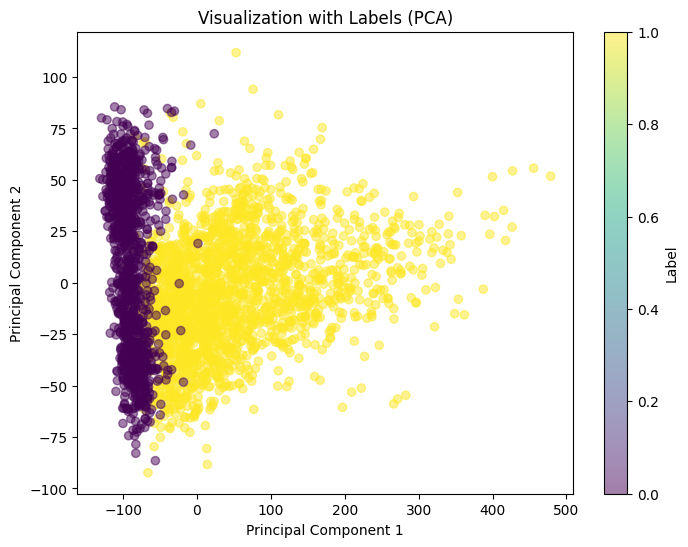

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

x= df.drop(0,axis=1)
y=df.iloc[:,0]
# Reduce dimensionality using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)

plt.figure(figsize=(8, 6))
# Plot with labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, alpha=0.5)  # Use labels for coloring


plt.title('Visualization with Labels (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Label')
plt.show()

In [6]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

numeric_columns = df.drop(0,axis=1)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
scaled_data = scaler.fit_transform(numeric_columns)

# Create a DataFrame from the scaled data
x = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

df=pd.concat([df[0],x],axis=1)
df



,0,1,2,3,4
0,1,-0.185654,-0.569780,-1.064271,0.247786
1,1,0.754890,1.132932,0.072285,0.189854
2,1,-0.456973,0.630427,-0.818174,0.245410
3,1,-0.319384,0.122528,0.351963,0.970722
4,1,1.797858,1.888930,0.304556,1.175745
...,...,...,...,...,...
3084,0,-0.436936,-0.843594,1.273475,0.613426
3085,0,-0.441572,-1.041905,-0.673994,-1.479032
3086,0,-0.254503,-0.778951,1.657510,0.265199
3087,0,-0.303334,-0.949475,0.590524,-0.376850


In [7]:
import pandas as pd
yes = df[df[0] == 1]
no = df[df[0] == 0]
import random
random.seed(41)
# Sample from each subset to get the desired number of samples
sampled_yes = yes.sample(n=min(40, len(yes)), replace=False)
sampled_no = no.sample(n=min(20, len(no)), replace=False)

# Concatenate the sampled subsets into a single DataFrame
Xy1 = pd.concat([sampled_yes, sampled_no])
X1=Xy1.drop(0,axis=1)

In [8]:
import pandas as pd
import random
def unlabel_data(df, percentage_to_unlabel):
  num_to_unlabel = int(len(df) * percentage_to_unlabel)
  indices_to_unlabel = random.sample(range(len(df)), num_to_unlabel)
  df.loc[indices_to_unlabel, 0] = None # Replace with your label column name
  return df
# Unlabel 70% of the data
df1 = unlabel_data(df.copy(), 0.7)

In [26]:
import numpy as np
import multiprocessing

def compute_distance(i, data1, data2):
    distances = np.zeros(data2.shape[0], dtype=np.float32)
    for j in range(data2.shape[0]):
        distances[j] = np.exp(-0.5*np.linalg.norm(data1.iloc[i] - data2.iloc[j])**2)
    return distances

def distance_matrix_parallel(data1, data2):
    num_samples1 = data1.shape[0]
    num_samples2 = data2.shape[0]
    num_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_processes)
    results = [pool.apply_async(compute_distance, args=(i, data1, data2)) for i in range(num_samples1)]
    distance_matrix = np.array([result.get() for result in results])
    return distance_matrix

W = distance_matrix_parallel(X1, X1)
W

array([[1.0000000e+00, 8.9774770e-01, 4.8093248e-11, ..., 2.3276375e-01,
        7.6607043e-01, 4.6425694e-01],
       [8.9774770e-01, 1.0000000e+00, 6.7692130e-10, ..., 2.1317962e-01,
        5.4258639e-01, 4.2657197e-01],
       [4.8093248e-11, 6.7692130e-10, 1.0000000e+00, ..., 1.8173830e-13,
        8.7152976e-12, 1.2532381e-12],
       ...,
       [2.3276375e-01, 2.1317962e-01, 1.8173830e-13, ..., 1.0000000e+00,
        9.7351082e-02, 8.9562631e-01],
       [7.6607043e-01, 5.4258639e-01, 8.7152976e-12, ..., 9.7351082e-02,
        1.0000000e+00, 2.2795691e-01],
       [4.6425694e-01, 4.2657197e-01, 1.2532381e-12, ..., 8.9562631e-01,
        2.2795691e-01, 1.0000000e+00]], dtype=float32)

In [10]:
W1=distance_matrix_parallel(x,X1)
K = np.dot(np.dot(W1, np.linalg.inv(W)), W1.T)
row_sums = np.sum(K, axis=1)
# Create a diagonal matrix D with row_sums as diagonal elements
D = np.diag(row_sums)

In [11]:
S = D-K
H=W1
# Filter rows with non-null values in the first column
dfl = df1.loc[pd.notnull(df1.iloc[:, 0])]
# Filter rows with null values in the first column
dfu = df1.loc[pd.isnull(df1.iloc[:, 0])]
xl=dfl.drop(0,axis=1)
xu=dfu.drop(0,axis=1)
Hl=distance_matrix_parallel(xl,X1)

In [12]:
Hu=distance_matrix_parallel(xu,X1)
x3=dfl.drop(0,axis=1)

In [13]:
W1l=Hl

In [14]:
def response_matrix(data):
  num_samples=len(data)
  response_matrix = np.zeros((num_samples, 2), dtype=np.float32)
  for i in range(num_samples):
    if data.iloc[i]==0:
      response_matrix[i, 0] = 1
      response_matrix[i,1]=0
    elif data.iloc[i]==1:
      response_matrix[i, 0] = 0
      response_matrix[i,1]=1
  return response_matrix
yl=dfl.iloc[:,0]
Yl= response_matrix(yl)

In [15]:
import numpy as np
M1 = np.dot(np.dot(H.T, S), H)+ 10000* np.dot(Hl.T, Hl) + 0* np.dot(Hu.T, Hu)
M2 = np.linalg.inv(M1)
M3 = np.dot(W1l.T, Yl)
# Step 2: Compute final result
fv = np.dot(M2, M3)
f=np.dot(H,fv)

In [16]:
y_pred=[]
for i in range(3089):
  if f[i,0]>f[i,1]:
    y_pred.append(0)
  else:
    y_pred.append(1)
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df.iloc[:,0],y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1043   46]
 [  65 1935]]


In [17]:
import numpy as np
import multiprocessing

def compute_distance(i, data1, data2):
    distances = np.zeros(data2.shape[0], dtype=np.float32)
    for j in range(data2.shape[0]):
        distances[j] = np.exp(-0.5 * (np.linalg.norm(data1.iloc[i] - data2.iloc[j], ord=1))**2)
    return distances

def distance_matrix_parallel(data1, data2):
    num_samples1 = data1.shape[0]
    num_samples2 = data2.shape[0]
    num_processes = multiprocessing.cpu_count()
    pool = multiprocessing.Pool(processes=num_processes)
    results = [pool.apply_async(compute_distance, args=(i, data1, data2)) for i in range(num_samples1)]
    distance_matrix = np.array([result.get() for result in results])
    return distance_matrix

# Assuming X1 is your first dataset and X2 is your second dataset
W = distance_matrix_parallel(X1, X1)

In [18]:
W1=distance_matrix_parallel(x,X1)
K = np.dot(np.dot(W1, np.linalg.inv(W)), W1.T)
row_sums = np.sum(K, axis=1)
# Create a diagonal matrix D with row_sums as diagonal elements
D = np.diag(row_sums)

In [19]:
S = D-K
H=W1
# Filter rows with non-null values in the first column
dfl = df1.loc[pd.notnull(df1.iloc[:, 0])]
# Filter rows with null values in the first column
dfu = df1.loc[pd.isnull(df1.iloc[:, 0])]
xl=dfl.drop(0,axis=1)
xu=dfu.drop(0,axis=1)
Hl=distance_matrix_parallel(xl,X1)

In [20]:
Hu=distance_matrix_parallel(xu,X1)
x3=dfl.drop(0,axis=1)

In [21]:
W1l=Hl

In [22]:
def response_matrix(data):
  num_samples=len(data)
  response_matrix = np.zeros((num_samples, 2), dtype=np.float32)
  for i in range(num_samples):
    if data.iloc[i]==0:
      response_matrix[i, 0] = 1
      response_matrix[i,1]=0
    elif data.iloc[i]==1:
      response_matrix[i, 0] = 0
      response_matrix[i,1]=1
  return response_matrix
yl=dfl.iloc[:,0]
Yl= response_matrix(yl)

In [23]:
import numpy as np
M1 = np.dot(np.dot(H.T, S), H)+ 10000* np.dot(Hl.T, Hl) + 0* np.dot(Hu.T, Hu)
M2 = np.linalg.inv(M1)
M3 = np.dot(W1l.T, Yl)
# Step 2: Compute final result
fv = np.dot(M2, M3)
f=np.dot(H,fv)

In [24]:
y_pred=[]
for i in range(3089):
  if f[i,0]>f[i,1]:
    y_pred.append(0)
  else:
    y_pred.append(1)
# Create a confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(df.iloc[:,0],y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[1019   70]
 [  77 1923]]


In [30]:
n=[15,30,60,120,180,360,720]
acc=[]
import time
time_taken=[]
for i in n:
  random.seed(41)
  start=time.time()
# Sample from each subset to get the desired number of samples
  sampled_yes = yes.sample(n=min(int(2*i/3), len(yes)), replace=False)
  sampled_no = no.sample(n=min(int(i/3), len(no)), replace=False)

  # Concatenate the sampled subsets into a single DataFrame
  Xy1 = pd.concat([sampled_yes, sampled_no])
  X1=Xy1.drop(0,axis=1)
  W = distance_matrix_parallel(X1, X1)
  W1=distance_matrix_parallel(x,X1)
  K = np.dot(np.dot(W1, np.linalg.inv(W)), W1.T)
  row_sums = np.sum(K, axis=1)
  # Create a diagonal matrix D with row_sums as diagonal elements
  D = np.diag(row_sums)
  S = D-K
  H=W1
  # Filter rows with non-null values in the first column
  dfl = df1.loc[pd.notnull(df1.iloc[:, 0])]
  # Filter rows with null values in the first column
  dfu = df1.loc[pd.isnull(df1.iloc[:, 0])]
  xl=dfl.drop(0,axis=1)
  xu=dfu.drop(0,axis=1)
  Hl=distance_matrix_parallel(xl,X1)
  Hu=distance_matrix_parallel(xu,X1)
  x3=dfl.drop(0,axis=1)
  W1l=Hl
  import numpy as np
  M1 = np.dot(np.dot(H.T, S), H)+ 10000* np.dot(Hl.T, Hl) + 0* np.dot(Hu.T, Hu)
  M2 = np.linalg.inv(M1)
  M3 = np.dot(W1l.T, Yl)
  # Step 2: Compute final result
  fv = np.dot(M2, M3)
  f=np.dot(H,fv)
  y_pred=[]
  for i in range(3089):
    if f[i,0]>f[i,1]:
      y_pred.append(0)
    else:
      y_pred.append(1)
  # Create a confusion matrix
  from sklearn.metrics import confusion_matrix
  conf_matrix = confusion_matrix(df.iloc[:,0],y_pred)
  accuracy=(conf_matrix[0][0]+conf_matrix[1][1])/3089
  acc.append(accuracy)
  print(accuracy)
  end=time.time()
  t=end-start
  time_taken.append(t)
  print(t)

0.9339592101003561
41.215752601623535
0.9575914535448365
62.5544855594635
0.9575914535448365
111.28353643417358
0.7345419229524118
221.81736016273499
0.5380382000647459
294.923800945282
0.5325348009064422
586.4959621429443
0.4308837811589511
1257.2684581279755


In [36]:
N=[200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400,2600,2800,3000]
T=[]
for i in N:
  start=time.time()
  df=pd.read_csv('/content/drive/MyDrive/SVM.csv',header=None,delimiter=' ',nrows=i)
  x= df.drop(0,axis=1)
  y=df.iloc[:,0]

  import pandas as pd
  from sklearn.preprocessing import StandardScaler

  numeric_columns = df.drop(0,axis=1)

  # Initialize the StandardScaler
  scaler = StandardScaler()

  # Fit the scaler to the data and transform the data
  scaled_data = scaler.fit_transform(numeric_columns)

  # Create a DataFrame from the scaled data
  x = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

  df=pd.concat([df[0],x],axis=1)
  yes = df[df[0] == 1]
  no = df[df[0] == 0]
  import random
  random.seed(41)
  # Sample from each subset to get the desired number of samples
  sampled_yes = yes.sample(n=min(40, len(yes)), replace=False)
  sampled_no = no.sample(n=min(20, len(no)), replace=False)

  # Concatenate the sampled subsets into a single DataFrame
  Xy1 = pd.concat([sampled_yes, sampled_no])
  X1=Xy1.drop(0,axis=1)
  df1 = unlabel_data(df.copy(), 0.7)
  W = distance_matrix_parallel(X1, X1)
  W1=distance_matrix_parallel(x,X1)
  K = np.dot(np.dot(W1, np.linalg.inv(W)), W1.T)
  row_sums = np.sum(K, axis=1)
  # Create a diagonal matrix D with row_sums as diagonal elements
  D = np.diag(row_sums)
  S = D-K
  H=W1
  # Filter rows with non-null values in the first column
  dfl = df1.loc[pd.notnull(df1.iloc[:, 0])]
  # Filter rows with null values in the first column
  dfu = df1.loc[pd.isnull(df1.iloc[:, 0])]
  xl=dfl.drop(0,axis=1)
  xu=dfu.drop(0,axis=1)
  Hl=distance_matrix_parallel(xl,X1)
  Hu=distance_matrix_parallel(xu,X1)
  x3=dfl.drop(0,axis=1)
  W1l=Hl
  import numpy as np
  M1 = np.dot(np.dot(H.T, S), H)+ 10000* np.dot(Hl.T, Hl) + 0* np.dot(Hu.T, Hu)
  M2 = np.linalg.inv(M1)
  yl=dfl.iloc[:,0]
  Yl= response_matrix(yl)
  M3 = np.dot(W1l.T, Yl)
  # Step 2: Compute final result
  fv = np.dot(M2, M3)
  f=np.dot(H,fv)
  end=time.time()
  t=end-start
  T.append(t)
  print(t)

8.140102624893188
16.611724376678467
15.030032396316528
21.322343826293945
25.40728449821472
29.860891580581665
36.65178298950195
41.12011933326721
47.30394196510315
56.23492693901062
80.34986567497253
83.78724431991577
93.643061876297
99.40019607543945
105.06329870223999


Text(0, 0.5, 'Time(sec)')

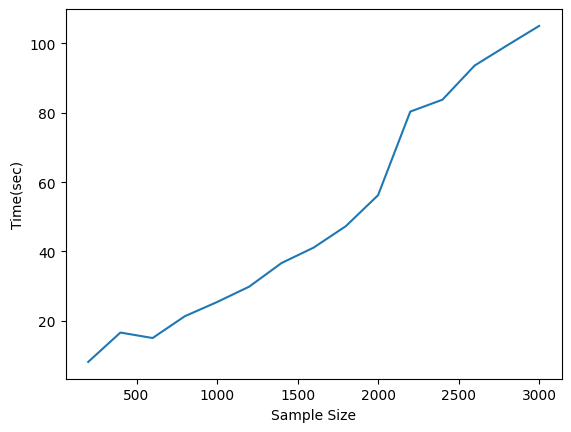

In [37]:
plt.plot(N,T)
plt.xlabel('Sample Size')
plt.ylabel('Time(sec)')